In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
data = pd.read_csv(r'C:\Users\pmven\Google Drive\1. myDocs\Projects\Nice Ride\Data\Nice_ride_trip_history_2017_season.csv', sep = ',', parse_dates = ['Start date', 'End date'])

In [113]:
data['Start_Month'] = pd.DatetimeIndex(data['Start date']).month
data['Start_Month'].unique()

array([11, 10,  9,  8,  7,  6,  5,  4], dtype=int64)

In [105]:
data.head()

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds),Start_Month
0,2017-11-05 21:45:00,Hennepin Ave & S Washington Ave,30184,2017-11-05 22:02:00,Logan Park,30104,Member,1048,11
1,2017-11-05 21:45:00,Broadway Street N & 4th Street E,30122,2017-11-05 22:26:00,Broadway Street N & 4th Street E,30122,Member,2513,11
2,2017-11-05 21:43:00,Dale Street & Grand Ave.,30106,2017-11-05 22:13:00,N Milton Street & Summit Ave,30101,Member,1817,11
3,2017-11-05 21:41:00,Weisman Art Museum,30183,2017-11-05 22:05:00,22nd Ave S & Franklin Ave,30014,Casual,1399,11
4,2017-11-05 21:38:00,South 2nd Street & 3rd Ave S,30030,2017-11-05 21:44:00,6th Ave SE & University Ave,30088,Member,370,11


In [13]:
# Total number of trips?
data.size

3685744

In [40]:
grp_start = data.groupby('Start station')
grp_end = data.groupby('End station')

In [44]:
# how many stations have been used?
print('Start Stations: ',len(grp_start.size()))
print('End Station: ',len(grp_end.size()))

Start Stations:  202
End Station:  202


In [94]:
# Where most Trips are Started
start_trips = pd.DataFrame(grp_start.size().sort_values(ascending = False))
start_trips.columns = ['Trips_start']
start_trips['Perc'] = round(start_trips['Trips_start'] / start_trips['Trips_start'].sum() * 100,2)
start_trips.head(10)

,Trips_start,Perc
Start station,,
Lake Street & Knox Ave S,10747,2.33
Washington Ave SE & Union Street SE,10278,2.23
Coffman Union,9544,2.07
Weisman Art Museum,9221,2.00
6th Ave SE & University Ave,8502,1.85
11th Ave S & S 2nd Street,8322,1.81
McNamara Center,8315,1.80
100 Main Street SE,8300,1.80
Willey Hall,7865,1.71


In [95]:
# Where most Trips end
end_trips = pd.DataFrame(grp_end.size().sort_values(ascending = False))
end_trips.columns = ['Trips_end']
end_trips['Perc'] = round(end_trips['Trips_end'] / end_trips['Trips_end'].sum() * 100,2)
end_trips.head(10)

,Trips_end,Perc
End station,,
Lake Street & Knox Ave S,11658,2.53
Washington Ave SE & Union Street SE,10117,2.20
Weisman Art Museum,8618,1.87
11th Ave S & S 2nd Street,8598,1.87
6th Ave SE & University Ave,8597,1.87
Coffman Union,8545,1.85
100 Main Street SE,8539,1.85
McNamara Center,8368,1.82
15th Ave SE & 4th Street SE,7578,1.64


In [96]:
# What are the most used stations amongst top 10?
pd.merge(start_trips.head(10), end_trips.head(10), left_index=True, right_index=True)

,Trips_start,Perc_x,Trips_end,Perc_y
Lake Street & Knox Ave S,10747,2.33,11658,2.53
Washington Ave SE & Union Street SE,10278,2.23,10117,2.20
Coffman Union,9544,2.07,8545,1.85
Weisman Art Museum,9221,2.00,8618,1.87
6th Ave SE & University Ave,8502,1.85,8597,1.87
11th Ave S & S 2nd Street,8322,1.81,8598,1.87
McNamara Center,8315,1.80,8368,1.82
100 Main Street SE,8300,1.80,8539,1.85


In [111]:
# Number of Trips per Month?
data.groupby('Start_Month').size()

Start_Month
4     39694
5     61165
6     77014
7     95566
8     70822
9     71422
10    42691
11     2344
dtype: int64

In [126]:
# What station observe the most frequent trips?
freq_trips = data.groupby(['Start station', 'End station'], as_index=False).size()
freq_trips = freq_trips.reset_index()
freq_trips.columns = ['Start station', 'End station', 'Trips']
freq_trips.sort_values(by = 'Trips', ascending = False, inplace = True)

In [129]:
freq_trips.head()

,Start station,End station,Trips
10399,Lake Street & Knox Ave S,Lake Street & Knox Ave S,4853
9947,Lake Calhoun Center,Lake Calhoun Center,3171
10100,Lake Harriet Bandshell,Lake Harriet Bandshell,2650
10034,Lake Como Pavilion,Lake Como Pavilion,2156
17289,W 36th Street & W Calhoun Parkway,W 36th Street & W Calhoun Parkway,2037


In [130]:
# There seems to be trips where start and End Stations are the same.
# Seperating the two will give a better picture

In [131]:
same_trips = freq_trips[freq_trips['Start station'] == freq_trips['End station']]
same_trips.head()

,Start station,End station,Trips
10399,Lake Street & Knox Ave S,Lake Street & Knox Ave S,4853
9947,Lake Calhoun Center,Lake Calhoun Center,3171
10100,Lake Harriet Bandshell,Lake Harriet Bandshell,2650
10034,Lake Como Pavilion,Lake Como Pavilion,2156
17289,W 36th Street & W Calhoun Parkway,W 36th Street & W Calhoun Parkway,2037


In [132]:
diff_trips = freq_trips[freq_trips['Start station'] != freq_trips['End station']]
diff_trips.head()

,Start station,End station,Trips
19057,Willey Hall,Weisman Art Museum,1857
18335,Weisman Art Museum,Willey Hall,1832
18315,Weisman Art Museum,Social Sciences,1574
16130,Social Sciences,Weisman Art Museum,1245
18083,Washington Ave SE & Union Street SE,4th Street & 13th Ave SE,934


### Account Type 

In [133]:
# How accounts differ in the type of trips taken?

In [135]:
# Unique Account Types
data['Account type'].unique()

array(['Member', 'Casual', 'Inconnu'], dtype=object)

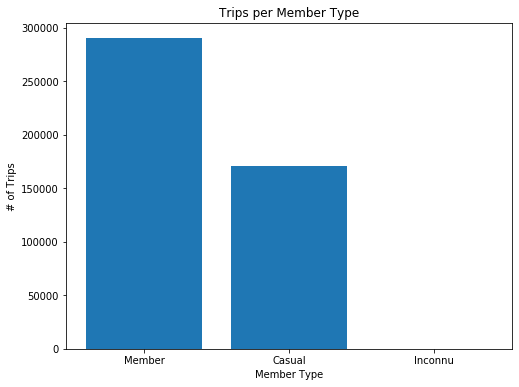

In [164]:
# Trips Distribution
plt.figure(figsize = (8,6)) 
acc_type = data.groupby('Account type').size().sort_values(ascending = False)
plt.bar(acc_type.index,acc_type.values)
plt.xlabel('Member Type')
plt.ylabel('# of Trips')
plt.title('Trips per Member Type')
plt.show()

In [184]:
# Trips Trend per month
trip_month = data.groupby(['Account type', 'Start_Month']).size()
trip_month = trip_month.reset_index()

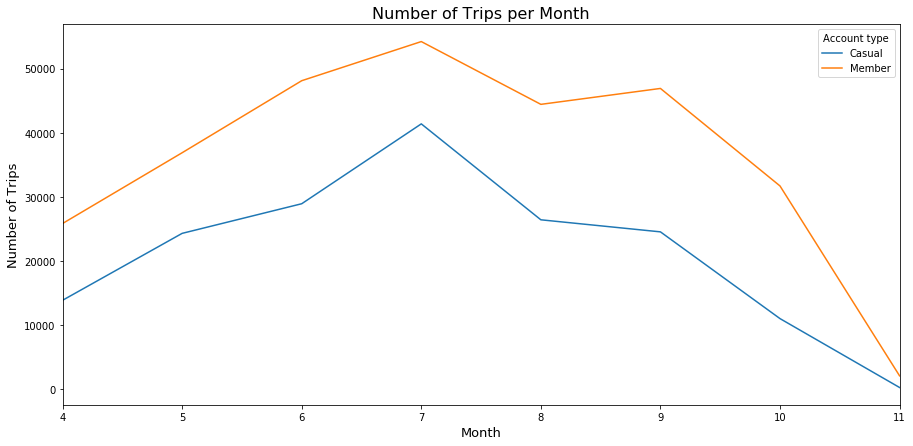

In [190]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Number of Trips per Month', fontsize = 16)
data[data['Account type'] != 'Inconnu'].groupby(['Start_Month','Account type']).size().unstack().plot(ax = ax)
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Number of Trips', fontsize = 13)
plt.show()